In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

514

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 11 | ribeira grande
Processing Record 2 of Set 11 | rio cuarto
Processing Record 3 of Set 11 | puerto ayora
Processing Record 4 of Set 11 | cairns
Processing Record 5 of Set 11 | la ronge
Processing Record 6 of Set 11 | zaraza
Processing Record 7 of Set 11 | punta arenas
Processing Record 8 of Set 11 | caravelas
Processing Record 9 of Set 11 | yellowknife
Processing Record 10 of Set 11 | turka
Processing Record 11 of Set 11 | vardo
Processing Record 12 of Set 11 | mataura
Processing Record 13 of Set 11 | deputatskiy
Processing Record 14 of Set 11 | yulara
Processing Record 15 of Set 11 | axim
Processing Record 16 of Set 11 | ushuaia
Processing Record 17 of Set 11 | los llanos de aridane
Processing Record 18 of Set 11 | rikitea
Processing Record 19 of Set 11 | nanortalik
Processing Record 20 of Set 11 | srednekolymsk
Processing Record 21 of Set 11 | barrow
Processing Record 22 of Set 11 | busselton
Pr

Processing Record 37 of Set 14 | yuyao
Processing Record 38 of Set 14 | necochea
Processing Record 39 of Set 14 | asgabat
Processing Record 40 of Set 14 | pyaozerskiy
Processing Record 41 of Set 14 | yerofey pavlovich
Processing Record 42 of Set 14 | khatanga
Processing Record 43 of Set 14 | sulz
Processing Record 44 of Set 14 | arman
Processing Record 45 of Set 14 | muros
Processing Record 46 of Set 14 | vestmannaeyjar
Processing Record 47 of Set 14 | san quintin
Processing Record 48 of Set 14 | rincon
Processing Record 49 of Set 14 | hermanus
Processing Record 50 of Set 14 | aquiraz
Processing Record 1 of Set 15 | vilhena
Processing Record 2 of Set 15 | kirakira
Processing Record 3 of Set 15 | veinticinco de mayo
Processing Record 4 of Set 15 | port hardy
Processing Record 5 of Set 15 | tilichiki
Processing Record 6 of Set 15 | ozinki
Processing Record 7 of Set 15 | dingle
Processing Record 8 of Set 15 | vanimo
Processing Record 9 of Set 15 | tautira
Processing Record 10 of Set 15 | 

Processing Record 19 of Set 18 | ipixuna
Processing Record 20 of Set 18 | lamar
Processing Record 21 of Set 18 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 18 | hong
Processing Record 23 of Set 18 | avera
Processing Record 24 of Set 18 | visby
Processing Record 25 of Set 18 | shingu
Processing Record 26 of Set 18 | le vauclin
Processing Record 27 of Set 18 | teknaf
Processing Record 28 of Set 18 | lukulu
Processing Record 29 of Set 18 | moindou
Processing Record 30 of Set 18 | itarema
Processing Record 31 of Set 18 | baiao
Processing Record 32 of Set 18 | kayseri
Processing Record 33 of Set 18 | usinsk
Processing Record 34 of Set 18 | meulaboh
Processing Record 35 of Set 18 | bull savanna
Processing Record 36 of Set 18 | road town
Processing Record 37 of Set 18 | jamame
Processing Record 38 of Set 18 | bathsheba
Processing Record 39 of Set 18 | iquique
Processing Record 40 of Set 18 | sekoma
Processing Record 41 of Set 18 | isangel
Processing Record 42 of Set 1

In [7]:
len(city_data)

466

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,69.73,88,92,27.51,PT,2021-11-07 00:33:48
1,Rio Cuarto,-33.1307,-64.3499,55.17,67,40,10.36,AR,2021-11-07 00:29:06
2,Puerto Ayora,-0.7393,-90.3518,69.37,77,49,9.73,EC,2021-11-07 00:33:48
3,Cairns,-16.9167,145.7667,90.95,62,40,5.75,AU,2021-11-07 00:33:48
4,La Ronge,55.1001,-105.2842,37.65,93,90,2.30,CA,2021-11-07 00:33:49
5,Zaraza,9.3503,-65.3245,77.41,79,89,5.61,VE,2021-11-07 00:33:49
6,Punta Arenas,-53.1500,-70.9167,50.11,81,90,9.22,CL,2021-11-07 00:33:49
7,Caravelas,-17.7125,-39.2481,72.86,79,71,6.35,BR,2021-11-07 00:33:50
8,Yellowknife,62.4560,-114.3525,31.41,90,75,9.22,CA,2021-11-07 00:30:48
9,Turka,49.1541,23.0297,33.94,90,60,5.99,UA,2021-11-07 00:33:50


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-07 00:33:48,38.5167,-28.7000,69.73,88,92,27.51
1,Rio Cuarto,AR,2021-11-07 00:29:06,-33.1307,-64.3499,55.17,67,40,10.36
2,Puerto Ayora,EC,2021-11-07 00:33:48,-0.7393,-90.3518,69.37,77,49,9.73
3,Cairns,AU,2021-11-07 00:33:48,-16.9167,145.7667,90.95,62,40,5.75
4,La Ronge,CA,2021-11-07 00:33:49,55.1001,-105.2842,37.65,93,90,2.30
...,...,...,...,...,...,...,...,...,...
461,Prince Rupert,CA,2021-11-07 00:45:52,54.3161,-130.3201,42.49,87,100,5.75
462,Aasiaat,GL,2021-11-07 00:46:21,68.7098,-52.8699,14.61,96,100,9.98
463,Palora,EC,2021-11-07 00:46:21,-1.7000,-77.9333,65.73,98,94,2.28
464,Korla,CN,2021-11-07 00:46:22,41.7597,86.1469,22.93,44,5,5.37


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

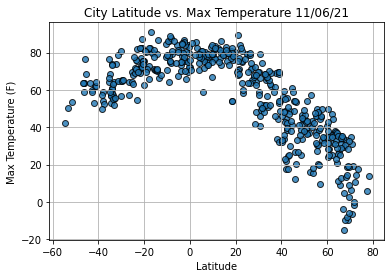

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

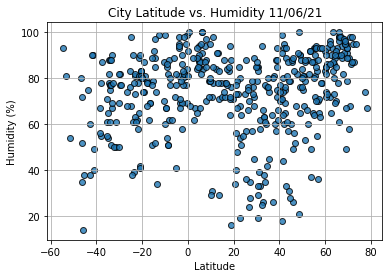

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

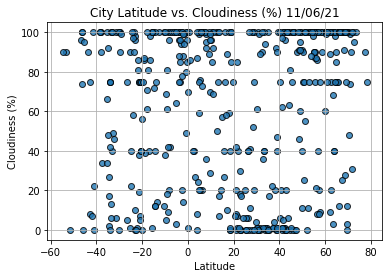

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()